In [31]:
#loading dataset
import pandas as pd
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Importing the Dataset

In [32]:
df = pd.read_csv("/Users/debjitpal/Documents/GitHub/ML-Crate/Rice type classification/Dataset/riceClassification.csv")
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [33]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [35]:
df.isna().sum(axis=0)

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [36]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

### Dropping unnecessary columns

In [37]:
df.drop(columns=['id'],inplace=True)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [38]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


### Exploratory Data Analysis

Text(0.5, 1.0, 'Class distribution')

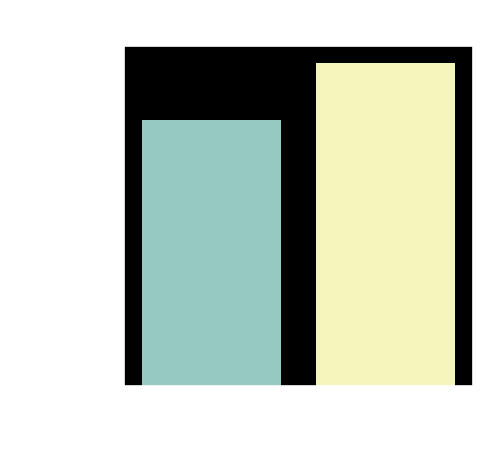

In [39]:
plt.figure(figsize=(3,3),dpi=150)
plt.style.use('dark_background')
sns.countplot(x='Class', data = df)
plt.xlabel('Target classes')
plt.ylabel('count of each class')
plt.title('Class distribution')
#plt.savefig("/Users/debjitpal/Documents/GitHub/ML-Crate/Rice type classification/Images/Class_distribution.png",bbox_inches = 'tight')

Text(0.5, 1.0, 'Correlation Heatmap')

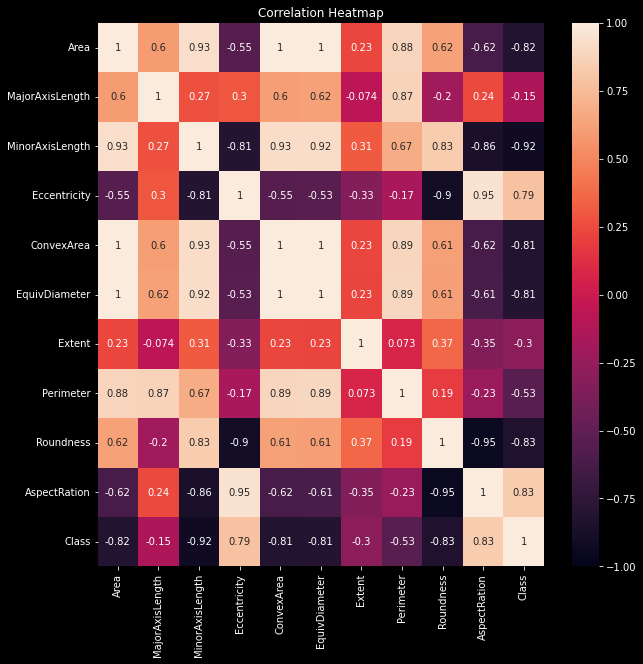

In [40]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin= -1, vmax = 1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})
#plt.savefig("/Users/debjitpal/Documents/GitHub/ML-Crate/Rice type classification/Images/Correlation_heatmap.png",bbox_inches = 'tight')

### Partitioning the dataset into training and test sets

In [41]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print("//Independent features//")
print(X.head())
print("\n\n//Dependent feature//")
print(y.head())

//Independent features//
   Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  4537        92.229316        64.012769      0.719916        4677   
1  2872        74.691881        51.400454      0.725553        3015   
2  3048        76.293164        52.043491      0.731211        3132   
3  3073        77.033628        51.928487      0.738639        3157   
4  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
0      76.004525  0.657536    273.085   0.764510      1.440796  
1      60.471018  0.713009    208.317   0.831658      1.453137  
2      62.296341  0.759153    210.012   0.868434      1.465950  
3      62.551300  0.783529    210.657   0.870203      1.483456  
4      68.571668  0.769375    230.332   0.874743      1.510000  


//Dependent feature//
0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


### Train Test Split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Feature Scaling

In [43]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
# Logistic Regression
lr=LogisticRegression()
lr_mdl=lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
lr_con_matrix=confusion_matrix(y_test,lr_pred)
lr_acc=accuracy_score(y_test,lr_pred)
print("Confusion Matrix",'\n',lr_con_matrix)
print('\n')
print("Accuracy of Logistic Regression: ",lr_acc*100,'\n')
print(classification_report(y_test,lr_pred))

Confusion Matrix 
 [[2442   39]
 [  31 2944]]


Accuracy of Logistic Regression:  98.71700879765396 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2481
           1       0.99      0.99      0.99      2975

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456



In [45]:
#Random Forest Classfier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_con_matrix = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
print("Confusion Matrix\n",rf_con_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc*100,'\n')
print(classification_report(y_test,rf_pred))

Confusion Matrix
 [[2437   44]
 [  29 2946]]


Accuracy of Random Forest: 98.66202346041055 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2481
           1       0.99      0.99      0.99      2975

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456



In [46]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_con_matrix = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
print("Confusion Matrix\n",dt_con_matrix)
print("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc*100,'\n')
print(classification_report(y_test,dt_pred))

Confusion Matrix
 [[2435   46]
 [  58 2917]]


Accuracy of Decision Tree Classifier: 98.09384164222874 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2481
           1       0.98      0.98      0.98      2975

    accuracy                           0.98      5456
   macro avg       0.98      0.98      0.98      5456
weighted avg       0.98      0.98      0.98      5456



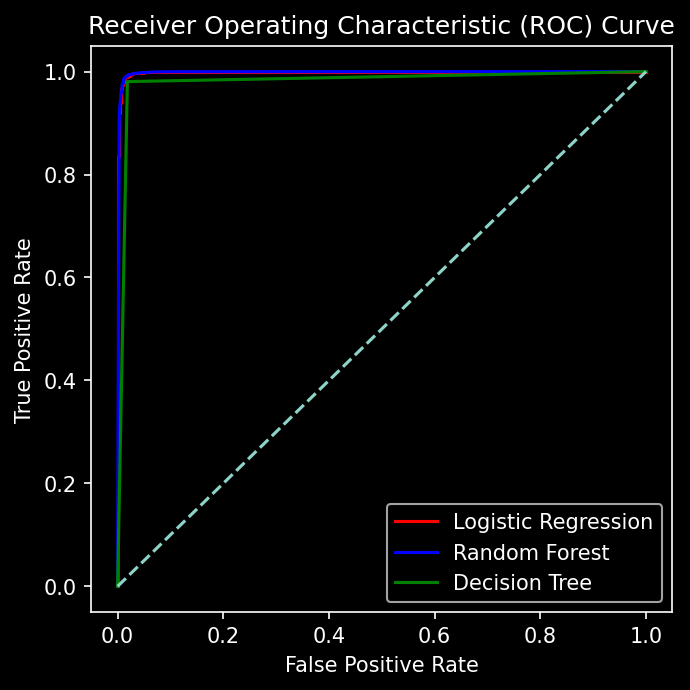

In [47]:
y_score1 = lr.predict_proba(X_test)[:,1]
y_score2 = rf.predict_proba(X_test)[:,1]
y_score3 = dt.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

plt.figure(figsize=(5,5),dpi=150)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(false_positive_rate1,true_positive_rate1, color='red', label = "Logistic Regression")
plt.plot(false_positive_rate2,true_positive_rate2, color='blue', label = "Random Forest")
plt.plot(false_positive_rate3,true_positive_rate3, color='green', label = "Decision Tree")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("/Users/debjitpal/Documents/GitHub/ML-Crate/Rice type classification/Images/ROC_curve.png",bbox_inches = 'tight')

In [48]:
mdl_evl = pd.DataFrame({'Model': ['Logistic Regression','Random Forest', 'Decision Tree'], 'Accuracy': [lr_acc*100,rf_acc*100,dt_acc*100]})
mdl_evl

,Model,Accuracy
0,Logistic Regression,98.717009
1,Random Forest,98.662023
2,Decision Tree,98.093842


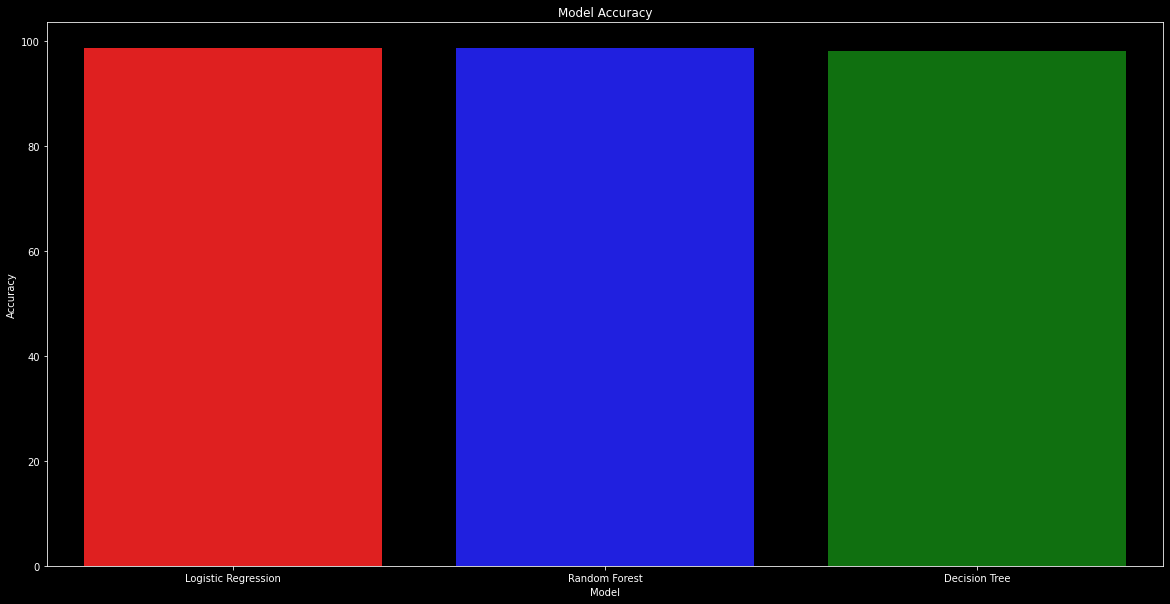

In [49]:
pal=['red','blue','green']
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x="Model",y="Accuracy",palette=pal,data=mdl_evl)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
#plt.savefig("/Users/debjitpal/Documents/GitHub/ML-Crate/Rice type classification/Images/Model_accuracy.png",bbox_inches = 'tight')

So according to the accuracy scores the best model is Logistic Regression.